# Sentiment Analysis on tweets about Ohio elections
<br>


#### Scope
1- Pull tweets by the hashtags below </b> <br>
2- Perform sentiment analysis </b> <br>
3- Viz results </b> <br>

<br>

##### Hashtags
***
2022 Senate elections in Ohio: 
<br>

    J.D. Vance (Republican) >> #JDVance <br>
    Tim Ryan (Democratic)  >> #TimRyan <br>
***
2022 elections for Governor of Ohio: 
<br>

    Mike DeWine (R) >> #MikeDeWine <br>
    Nan Whaley (D) >> #NanWhaley <br>
    
<br>

**Sample size**:  4500 tweets for each candidate (total of 9000 tweets) from the beginning of Jan 2022 to Nov 3rd 2022 

<br>

**Models used**: 

- snscrape to pull tweets
Github Repo: https://github.com/JustAnotherArchivist/snscrape
<br>

- Twitter-roBERTa-base for Sentiment Analysis - UPDATED (2021)
This is a roBERTa-base model trained on ~124M tweets from January 2018 to December 2021, and finetuned for sentiment analysis with the TweetEval benchmark
https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest?text=Covid+cases+are+increasing+fast%21

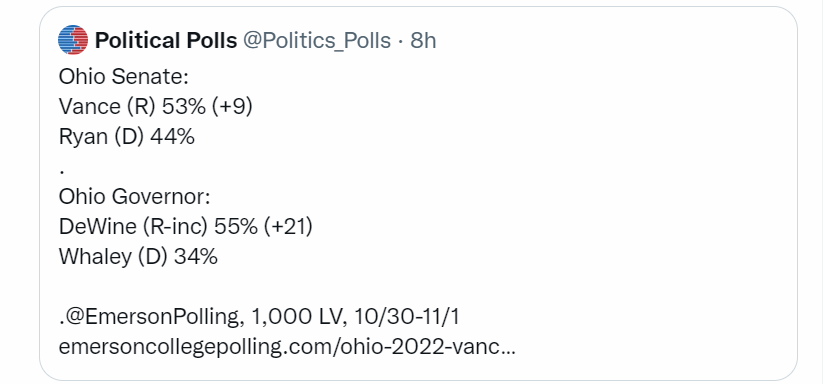

In [2]:
# # importing libraries and packages
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

##### Pull Tweets about each candidate

In [27]:
def tweets_scraper(candidate):

    # Creating list to append tweet data
    tweets_list = []
    # Using TwitterSearchScraper to scrape data and append tweets to list
    for i, tweet in tqdm(
        enumerate(
            sntwitter.TwitterSearchScraper(
                f"#{candidate} since:2022-01-01 until:2022-11-04"
            ).get_items()
        ),
        total=4_500,
    ):  # declare a username
        if i > 4_500:  # number of tweets you want to scrape
            break
        tweets_list.append(
            [tweet.date, tweet.id, tweet.content, tweet.user.username]
        )  # declare the attributes to be returned
    # Creating a dataframe from the tweets list above
    tweet_df = pd.DataFrame(
        tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
    )
    
    return tweet_df

In [28]:
# tweets about #jdvance and #timryan 

jdvance_tweets = tweets_scraper("JDVance")
timryan_tweets = tweets_scraper("TimRyan")

In [ ]:
# tweets about #mikedewine and #nanwhaley 

mdewine_tweets = tweets_scraper("MikeDeWine")
nanwhaley_tweets = tweets_scraper("NanWhaley")

In [29]:
jdvance_tweets.to_csv("Data/jdvance_tweets.csv", index=False)

In [30]:
timryan_tweets.to_csv("Data/timryan_tweets.csv", index=False)

In [31]:
# https://github.com/RobMulla/twitch-stream-projects/blob/main/051-stock-sentiment/stock-sentiment.ipynb
# https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest?text=Covid+cases+are+increasing+fast%21

In [32]:
jdvance_tweets.head(5)

,Datetime,Tweet Id,Text,Username
0,2022-11-03 23:52:51+00:00,1588318319324860417,@TimRyan Vote Red all the way ! #JDVance,HattiePittie
1,2022-11-03 23:45:53+00:00,1588316564163813376,@InBed17 🤣I don't even want Trump in 2024 \n\n...,pamp00vey
2,2022-11-03 23:31:44+00:00,1588313006076821504,#TrumpRally\n#OhioTrumpRally\n#Ohio\n#JDVance ...,pamp00vey
3,2022-11-03 22:19:40+00:00,1588294867750645760,"@TimRyan @MrScottLads Putting it simply, \n\n#...",universenus
4,2022-11-03 21:55:37+00:00,1588288816040665089,@TimRyan YOU ARE GOING TO WIN TIM. YOU ARE AUT...,lovepeace3124


#### Sentiment Analysis

In [7]:
# test model
model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

sentiment_task = pipeline("sentiment-analysis", model=model)
sentiment_task("Covid cases are increasing fast!")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'Negative', 'score': 0.7235768437385559}]

In [10]:
jdvance_tweets = pd.read_csv("Data/jdvance_tweets.csv")
jdvance_tweets

,Datetime,Tweet Id,Text,Username
0,2022-11-03 23:52:51+00:00,1588318319324860417,@TimRyan Vote Red all the way ! #JDVance,HattiePittie
1,2022-11-03 23:45:53+00:00,1588316564163813376,@InBed17 🤣I don't even want Trump in 2024 \n\n...,pamp00vey
2,2022-11-03 23:31:44+00:00,1588313006076821504,#TrumpRally\n#OhioTrumpRally\n#Ohio\n#JDVance ...,pamp00vey
3,2022-11-03 22:19:40+00:00,1588294867750645760,"@TimRyan @MrScottLads Putting it simply, \n\n#...",universenus
4,2022-11-03 21:55:37+00:00,1588288816040665089,@TimRyan YOU ARE GOING TO WIN TIM. YOU ARE AUT...,lovepeace3124
...,...,...,...,...
4496,2022-04-19 20:38:12+00:00,1516516536932081667,@GOP Candidate #JDVance \nsaid #Trump might be...,2Freelancer
4497,2022-04-19 20:31:35+00:00,1516514871780773896,JD Vance: Im GoNnA TaKe oN ThE eLiTeS &amp; Bi...,MatHelman
4498,2022-04-19 20:27:19+00:00,1516513798219251721,"#JDVance wrote ""Hillbilly Elegy"". I read it. I...",VerbumIgnis
4499,2022-04-19 20:24:40+00:00,1516513132461666306,So. About #JDVance....,VerbumIgnis


In [11]:
timryan_tweets = pd.read_csv("Data/timryan_tweets.csv")
timryan_tweets

,Datetime,Tweet Id,Text,Username
0,2022-11-03 23:44:13+00:00,1588316146570100738,@TimRyan Vote for @TimRyan \n#TimRyan for #Ohi...,MJResister
1,2022-11-03 23:43:56+00:00,1588316077263814656,@TimRyan You should show your buddy's boo-boo ...,GBoy1982
2,2022-11-03 23:13:29+00:00,1588308411816751104,"And your party raised bail money for, encourag...",GBoy1982
3,2022-11-03 23:06:29+00:00,1588306649797705728,#TimRyan #VoteBlueIn2022 https://t.co/8olMWQQ3NH,asixtyschick
4,2022-11-03 23:04:18+00:00,1588306100700741632,@crooksandliars He's one of the few who can. #...,L_Shumate7
...,...,...,...,...
4496,2022-04-12 13:35:47+00:00,1513873516998934535,YESSS! #TimRyan #OHSen https://t.co/8QSgpb1ajz,snoozeq1
4497,2022-04-11 16:08:08+00:00,1513549468095897602,@NoLieWithBTC Glad he announced it! The GQP ca...,dinosaursindc
4498,2022-04-11 14:17:16+00:00,1513521570374983683,Paging @TimRyan did you see this? \n\nRun it e...,DewOfHeaven2
4499,2022-04-10 19:28:19+00:00,1513237460427448326,Dem leadership better be putting it all behind...,calatayud7


In [12]:
# flag each df with the #hashtag and then concat

jdvance_tweets['Hashtag'] = 'JDVance'
timryan_tweets['Hashtag'] = 'TimRyan'

tweet_df = pd.concat([jdvance_tweets, timryan_tweets])
tweet_df

,Datetime,Tweet Id,Text,Username,Hashtag
0,2022-11-03 23:52:51+00:00,1588318319324860417,@TimRyan Vote Red all the way ! #JDVance,HattiePittie,JDVance
1,2022-11-03 23:45:53+00:00,1588316564163813376,@InBed17 🤣I don't even want Trump in 2024 \n\n...,pamp00vey,JDVance
2,2022-11-03 23:31:44+00:00,1588313006076821504,#TrumpRally\n#OhioTrumpRally\n#Ohio\n#JDVance ...,pamp00vey,JDVance
3,2022-11-03 22:19:40+00:00,1588294867750645760,"@TimRyan @MrScottLads Putting it simply, \n\n#...",universenus,JDVance
4,2022-11-03 21:55:37+00:00,1588288816040665089,@TimRyan YOU ARE GOING TO WIN TIM. YOU ARE AUT...,lovepeace3124,JDVance
...,...,...,...,...,...
4496,2022-04-12 13:35:47+00:00,1513873516998934535,YESSS! #TimRyan #OHSen https://t.co/8QSgpb1ajz,snoozeq1,TimRyan
4497,2022-04-11 16:08:08+00:00,1513549468095897602,@NoLieWithBTC Glad he announced it! The GQP ca...,dinosaursindc,TimRyan
4498,2022-04-11 14:17:16+00:00,1513521570374983683,Paging @TimRyan did you see this? \n\nRun it e...,DewOfHeaven2,TimRyan
4499,2022-04-10 19:28:19+00:00,1513237460427448326,Dem leadership better be putting it all behind...,calatayud7,TimRyan


In [13]:
# run transformers model on all tweets

sent_results = {}
for i, d in tqdm(tweet_df.iterrows(), total=len(tweet_df)):
    sent = sentiment_task(d["Text"])
    sent_results[d["Tweet Id"]] = sent

In [17]:
sent_df = pd.DataFrame(sent_results).T
sent_df["label"] = sent_df[0].apply(lambda x: x["label"])
sent_df["score"] = sent_df[0].apply(lambda x: x["score"])
sent_df = sent_df.merge(
    tweet_df.set_index("Tweet Id"), left_index=True, right_index=True
)

In [18]:
sent_df

,0,label,score,Datetime,Text,Username,Hashtag
1513227056045297670,"{'label': 'Neutral', 'score': 0.8795298337936401}",Neutral,0.879530,2022-04-10 18:46:59+00:00,#TimRyan\n@TimRyan https://t.co/xG8T1cztbF,KaysGramma,TimRyan
1513237460427448326,"{'label': 'Negative', 'score': 0.5122110843658...",Negative,0.512211,2022-04-10 19:28:19+00:00,Dem leadership better be putting it all behind...,calatayud7,TimRyan
1513521570374983683,"{'label': 'Neutral', 'score': 0.6774628758430481}",Neutral,0.677463,2022-04-11 14:17:16+00:00,Paging @TimRyan did you see this? \n\nRun it e...,DewOfHeaven2,TimRyan
1513549468095897602,"{'label': 'Positive', 'score': 0.9183974862098...",Positive,0.918397,2022-04-11 16:08:08+00:00,@NoLieWithBTC Glad he announced it! The GQP ca...,dinosaursindc,TimRyan
1513873516998934535,"{'label': 'Positive', 'score': 0.9139376878738...",Positive,0.913938,2022-04-12 13:35:47+00:00,YESSS! #TimRyan #OHSen https://t.co/8QSgpb1ajz,snoozeq1,TimRyan
...,...,...,...,...,...,...,...
1588313006076821504,"{'label': 'Neutral', 'score': 0.9133479595184326}",Neutral,0.913348,2022-11-03 23:31:44+00:00,#TrumpRally\n#OhioTrumpRally\n#Ohio\n#JDVance ...,pamp00vey,JDVance
1588316077263814656,"{'label': 'Negative', 'score': 0.9144390821456...",Negative,0.914439,2022-11-03 23:43:56+00:00,@TimRyan You should show your buddy's boo-boo ...,GBoy1982,TimRyan
1588316146570100738,"{'label': 'Neutral', 'score': 0.6852514147758484}",Neutral,0.685251,2022-11-03 23:44:13+00:00,@TimRyan Vote for @TimRyan \n#TimRyan for #Ohi...,MJResister,TimRyan
1588316564163813376,"{'label': 'Negative', 'score': 0.4940989315509...",Negative,0.494099,2022-11-03 23:45:53+00:00,@InBed17 🤣I don't even want Trump in 2024 \n\n...,pamp00vey,JDVance


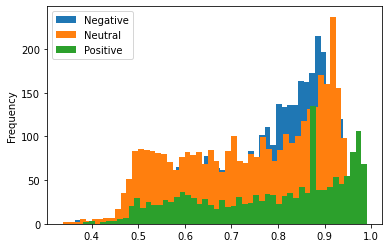

In [21]:
sent_df.groupby("label")["score"].plot(kind="hist", bins=50)
plt.legend()
plt.show()

In [29]:
summary = sent_df.groupby(['Hashtag', 'label'])['score'].count().reset_index()

In [115]:
summary['pct'] = round(summary.score / 4501 * 100, 1)
summary = summary.rename(columns = {"label": 'Sentiment Label', 'score': 'Sentiment Count'})
summary

,Hashtag,Sentiment Label,Sentiment Count,pct
0,JDVance,Negative,2240,49.8
1,JDVance,Neutral,1771,39.3
2,JDVance,Positive,490,10.9
3,TimRyan,Negative,1456,32.3
4,TimRyan,Neutral,1969,43.7
5,TimRyan,Positive,1076,23.9


In [3]:
df = pd.read_csv("Data/tweets_labeled.csv")
summary = df.groupby(['Hashtag', 'label'])['score'].count().reset_index()
summary['pct'] = round(summary.score / 4501 * 100, 1)
summary = summary.rename(columns = {"label": 'Sentiment Label', 'score': 'Sentiment Count', 'pct': 'Pct of Tweets'})
summary

,Hashtag,Sentiment Label,Sentiment Count,Pct of Tweets
0,JDVance,Negative,2240,49.8
1,JDVance,Neutral,1771,39.3
2,JDVance,Positive,490,10.9
3,TimRyan,Negative,1456,32.3
4,TimRyan,Neutral,1969,43.7
5,TimRyan,Positive,1076,23.9


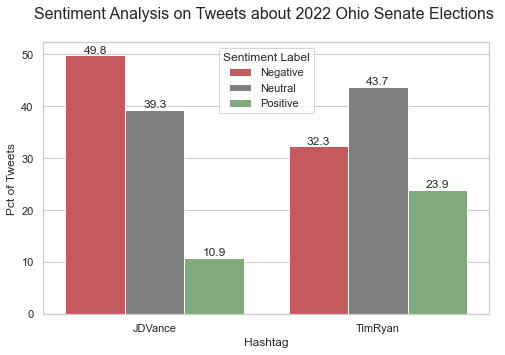

In [6]:
# set plot style: grey grid in the background:
colors = ["#d3494e", "gray", '#7bb274']


sns.set_palette(sns.color_palette(colors))
# sns.set_palette(sns.color_palette("coolwarm"))
# sns.set(style="darkgrid")
# sns.set(style="whitegrid")
# Set the figure size
plt.figure(figsize=(8, 5))

# grouped barplot
ax = sns.barplot(x="Hashtag", y="Pct of Tweets", hue="Sentiment Label", data=summary, ci=None)
for i in ax.containers:
    ax.bar_label(i,)

# ax.set_title('Sentiment Analysis on Tweets about 2022 Ohio Senate Elections \n \n')
plt.title('Sentiment Analysis on Tweets about 2022 Ohio Senate Elections \n', fontsize=16)
plt.show()

In [148]:
sent_df.to_csv("Data/tweets_labeled.csv", index=False)

In [12]:
import matplotlib

print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.6.2


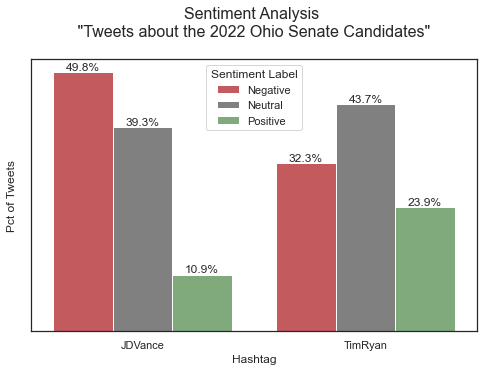

In [62]:
colors = ["#d3494e", "gray", '#7bb274']
sns.set_palette(sns.color_palette(colors))
# sns.set(style="white")
plt.figure(figsize=(8, 5))

ax = sns.barplot(x="Hashtag", y="Pct of Tweets", hue="Sentiment Label", data=summary, ci=None)
for c in ax.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/1:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='edge')

ax.set_yticklabels([])
plt.title('Sentiment Analysis \n "Tweets about the 2022 Ohio Senate Candidates" \n', fontsize=16)
plt.show()

In [35]:
summary['Pct of Tweets'].sum()

199.9